In [13]:
import cv2 as cv
import pydicom
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

<h5>For this part, I extracted the needed pixel information for matplotlib to visualize it</h5>

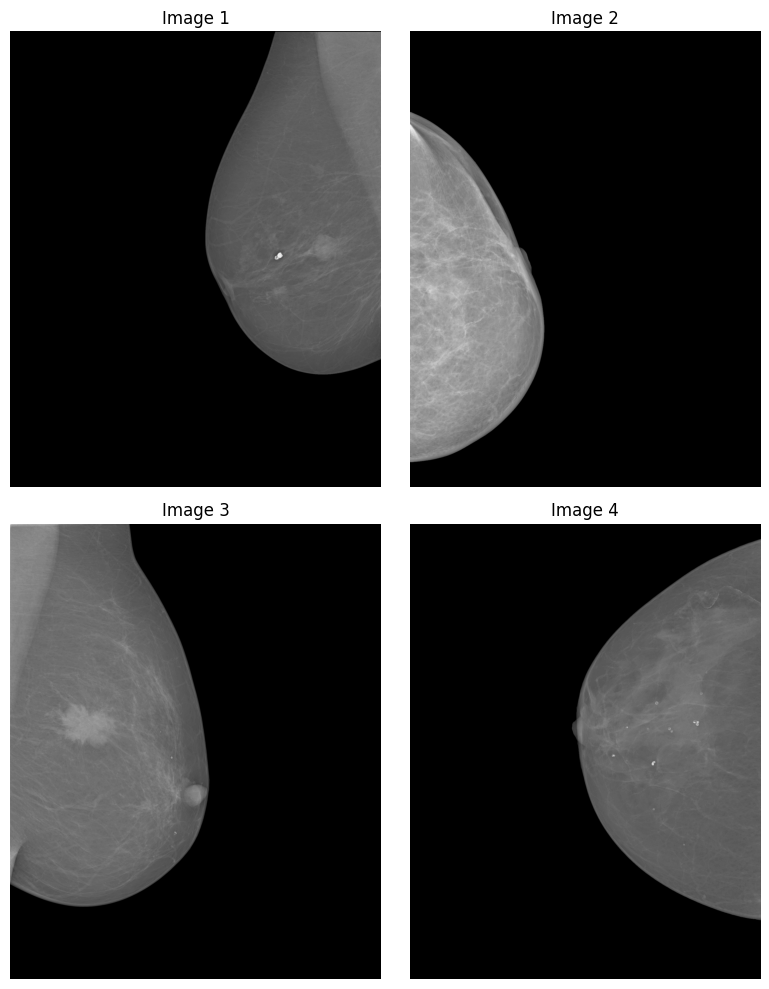

In [35]:
# Directory containing DICOM files
folder_path = 'inbreast/ALL-IMGS'

# List all DICOM files in the folder
dcm_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.dcm')]

# Randomly select 4 DICOM files
selected_files = random.sample(dcm_files, 4)

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 10))

# Iterate through each subplot and image
for i, ax in enumerate(axs.flat):
     # Load the DICOM file
    dicom_image = pydicom.dcmread(selected_files[i])
    # Extract the pixel data
    image_array = dicom_image.pixel_array
    if len(image_array.shape) == 2:  # Single channel (grayscale)
    # Display the grayscale image directly
      ax.imshow(image_array, cmap='gray')
      ax.set_title(f'Image {i+1}')
      ax.axis('off')  # Turn off axis
    else:
    # If not grayscale, convert to RGB if needed
      image_rgb = cv.cvtColor(image_array, cv.COLOR_BGR2RGB)
      ax.imshow(image_rgb)
      ax.set_title(f'Image {i+1}')
      ax.axis('off')  # Turn off axis

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [25]:
file_path = random.choice(dcm_files)
dicom_image = pydicom.dcmread(file_path)
print(dicom_image)

# Print specific metadata fields with safe access
print("Patient Name:", dicom_image.get('PatientName', 'Not Available'))
print("Study Date:", dicom_image.get('StudyDate', 'Not Available'))
print("Modality:", dicom_image.get('Modality', 'Not Available'))
print("Pixel Spacing:", dicom_image.get('PixelSpacing', 'Not Available'))


Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 208
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.9590.100.1.1.411767124512980641213855906693674121559
(0002,0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.3.6.1.4.1.9590.100.1.0.100.4.0
(0002,0013) Implementation Version Name         SH: 'MATLAB IPT 4.0'
-------------------------------------------------
(0008,0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008,0018) SOP Instance UID                    UI: 1.3.6.1.4.1.9590.100.1.1.411767124512980641213855906693674121559
(0008,0020) Study Date                          DA: ''
(0008,0023) Content Date                        DA: '20111229'
(0008,0030) Study Time      

In [29]:
# Directory containing DICOM files
dicom_directory = 'inbreast/ALL-IMGS'

# List to hold metadata
metadata_list = []

# Iterate through all files in the directory
for filename in os.listdir(dicom_directory):
    if filename.lower().endswith('.dcm'):
        file_path = os.path.join(dicom_directory, filename)
        dicom_image = pydicom.dcmread(file_path)

        # Extract relevant metadata
        metadata = {
            'Filename': filename,
            'Modality': dicom_image.Modality if 'Modality' in dicom_image else 'Not Available',
            'Rows': dicom_image.Rows if 'Rows' in dicom_image else 'Not Available',
            'Columns': dicom_image.Columns if 'Columns' in dicom_image else 'Not Available',
            'PixelSpacing': dicom_image.PixelSpacing if 'PixelSpacing' in dicom_image else 'Not Available',
            'PatientName': dicom_image.PatientName if 'PatientName' in dicom_image else 'Not Available',
            'PatientID': dicom_image.PatientID if 'PatientID' in dicom_image else 'Not Available',
            'StudyDate': dicom_image.StudyDate if 'StudyDate' in dicom_image else 'Not Available',
            'PatientBirthDate': dicom_image.StudyInstanceUID if 'PatientBirthDate' in dicom_image else 'Not Available'
        }

        # Append metadata to the list
        metadata_list.append(metadata)

# Create a DataFrame from the metadata list
df = pd.DataFrame(metadata_list)
df.head(10)
# Save the DataFrame to a CSV file
#df.to_csv('dicom_metadata.csv', index=False)

#print("Metadata extraction complete. CSV file saved as 'dicom_metadata.csv'.")


,Filename,Modality,Rows,Columns,PixelSpacing,PatientName,PatientID,StudyDate,PatientBirthDate
0,20586908_6c613a14b80a8591_MG_R_CC_ANON.dcm,OT,4084,3328,Not Available,(),,,1.3.6.1.4.1.9590.100.1.1.134970997511559836809...
1,20586934_6c613a14b80a8591_MG_L_CC_ANON.dcm,OT,4084,3328,Not Available,(),,,1.3.6.1.4.1.9590.100.1.1.854711727119219208229...
2,20586960_6c613a14b80a8591_MG_R_ML_ANON.dcm,OT,4084,3328,Not Available,(),,,1.3.6.1.4.1.9590.100.1.1.166149150512078816912...
3,20586986_6c613a14b80a8591_MG_L_ML_ANON.dcm,OT,4084,3328,Not Available,(),,,1.3.6.1.4.1.9590.100.1.1.237561877123839857130...
4,20587054_b6a4f750c6df4f90_MG_R_CC_ANON.dcm,OT,3328,2560,Not Available,(),,,1.3.6.1.4.1.9590.100.1.1.332752824510716042900...
...,...,...,...,...,...,...,...,...,...
405,53587599_11e6732579acf692_MG_L_CC_ANON.dcm,OT,4084,3328,Not Available,(),,,1.3.6.1.4.1.9590.100.1.1.153069921013273938422...
406,53587663_5fb370d4c1c71974_MG_R_CC_ANON.dcm,OT,4084,3328,Not Available,(),,,1.3.6.1.4.1.9590.100.1.1.275344194138450285002...
407,53587690_5fb370d4c1c71974_MG_L_ML_ANON.dcm,OT,4084,3328,Not Available,(),,,1.3.6.1.4.1.9590.100.1.1.304611839611591473414...
408,53587717_5fb370d4c1c71974_MG_R_ML_ANON.dcm,OT,4084,3328,Not Available,(),,,1.3.6.1.4.1.9590.100.1.1.398608108910364338336...


In [33]:
# Load the Excel sheet
excel_file_path = 'inbreast\INbreast.xls'
df = pd.read_excel(excel_file_path)

# Display the first few rows to understand its structure
df = df.drop(columns=['Patient ID','Patient age','Pectoral Muscle Annotation','Other Annotations','Lesion Annotation Status','Other Notes'])
df.head()



,Laterality,View,Acquisition date,File Name,ACR,Bi-Rads,Mass,Micros,Distortion,Asymmetry,Findings Notes (in Portuguese)
0,R,CC,201001.0,22678622.0,4,1,NaN,NaN,NaN,NaN,normal
1,L,CC,201001.0,22678646.0,4,3,X,NaN,NaN,NaN,nódulo
2,R,MLO,201001.0,22678670.0,4,1,NaN,NaN,NaN,NaN,normal
3,L,MLO,201001.0,22678694.0,4,3,X,NaN,NaN,NaN,nódulo
4,R,CC,201001.0,22614074.0,2,5,X,X,NaN,NaN,nódulo QSE + micros
